#### **IMPORT LIBRARIES AND LOAD MODEL**

In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')


2025-07-25 02:49:01.094552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753411741.298400      14 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753411741.358823      14 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### **LOAD AND PREPROCESS IMAGE**

In [2]:
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        return preprocess_input(img_array)
    except Exception as e:
        print(f"Error al cargar {img_path}: {e}")
        return None


#### **LOAD MODEL ResNet50 PRETRAINED**

In [3]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


2025-07-25 02:49:14.296200: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


#### **PROCESS IMAGES FROM CATALOG**

In [4]:
catalog_dir = "/kaggle/input/ferrari-dataset"
csv_path = "/kaggle/input/ferrari-dataset/ferrari_metadata.csv"

df = pd.read_csv(csv_path)

features = []
image_names = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    img_name = row['image_path']
    img_path = os.path.join(catalog_dir, img_name)

    img_array = load_and_preprocess_image(img_path)

    if img_array is not None:
        try:
            feat = model.predict(img_array)[0]
            features.append(feat)
            image_names.append(img_name)
        except Exception as e:
            print(f"❌ Error processing {img_name}: {e}")


  0%|          | 0/197 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 1/197 [00:02<07:53,  2.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  1%|          | 2/197 [00:02<03:42,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  2%|▏         | 3/197 [00:02<02:17,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  2%|▏         | 4/197 [00:03<01:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  3%|▎         | 5/197 [00:03<01:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  3%|▎         | 6/197 [00:03<01:03,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▎         | 7/197 [00:03<00:55,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▍         | 8/197 [00:03<00:49,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  5%|▍         | 9/197 [00:04<00:45,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|▌         | 10/197 [00:04<00:44,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  6%|▌         | 11/197 [00:04<00:45,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▌         | 12/197 [00:04<00:42,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 13/197 [00:04<00:40,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 14/197 [00:05<00:38,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 15/197 [00:05<00:37,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  8%|▊         | 16/197 [00:05<00:39,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▊         | 17/197 [00:05<00:38,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▉         | 18/197 [00:05<00:37,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 10%|▉         | 19/197 [00:06<00:37,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 10%|█         | 20/197 [00:06<00:36,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 11%|█         | 21/197 [00:06<00:36,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 11%|█         | 22/197 [00:06<00:36,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 12%|█▏        | 23/197 [00:07<00:35,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 12%|█▏        | 24/197 [00:07<00:35,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 13%|█▎        | 25/197 [00:07<00:36,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|█▎        | 26/197 [00:07<00:35,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▎        | 27/197 [00:07<00:34,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▍        | 28/197 [00:08<00:34,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 29/197 [00:08<00:35,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▌        | 30/197 [00:08<00:34,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 16%|█▌        | 31/197 [00:08<00:34,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 16%|█▌        | 32/197 [00:08<00:33,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 17%|█▋        | 33/197 [00:09<00:33,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█▋        | 34/197 [00:09<00:34,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|█▊        | 35/197 [00:09<00:35,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|█▊        | 36/197 [00:09<00:35,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 37/197 [00:10<00:35,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 38/197 [00:10<00:34,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 20%|█▉        | 39/197 [00:10<00:33,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 20%|██        | 40/197 [00:10<00:31,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 41/197 [00:10<00:30,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|██▏       | 42/197 [00:10<00:30,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 22%|██▏       | 43/197 [00:11<00:30,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 22%|██▏       | 44/197 [00:11<00:29,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 23%|██▎       | 45/197 [00:11<00:37,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 46/197 [00:12<00:40,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▍       | 47/197 [00:12<00:43,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|██▍       | 48/197 [00:12<00:44,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▍       | 49/197 [00:13<00:44,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▌       | 50/197 [00:13<00:46,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 26%|██▌       | 51/197 [00:13<00:47,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 26%|██▋       | 52/197 [00:13<00:41,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 27%|██▋       | 53/197 [00:14<00:37,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 27%|██▋       | 54/197 [00:14<00:34,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 55/197 [00:14<00:32,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██▊       | 56/197 [00:14<00:31,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▉       | 57/197 [00:14<00:32,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 29%|██▉       | 58/197 [00:15<00:31,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 30%|██▉       | 59/197 [00:15<00:33,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 30%|███       | 60/197 [00:15<00:37,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|███       | 61/197 [00:16<00:38,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 31%|███▏      | 62/197 [00:16<00:39,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 63/197 [00:16<00:40,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 64/197 [00:17<00:41,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 33%|███▎      | 65/197 [00:17<00:39,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 34%|███▎      | 66/197 [00:17<00:38,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 34%|███▍      | 67/197 [00:17<00:37,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 35%|███▍      | 68/197 [00:18<00:35,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 35%|███▌      | 69/197 [00:18<00:36,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 36%|███▌      | 70/197 [00:18<00:35,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 36%|███▌      | 71/197 [00:18<00:35,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 72/197 [00:19<00:34,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 73/197 [00:19<00:34,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 74/197 [00:19<00:33,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 75/197 [00:20<00:35,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▊      | 76/197 [00:20<00:35,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▉      | 77/197 [00:20<00:35,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|███▉      | 78/197 [00:21<00:36,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|████      | 79/197 [00:21<00:34,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 80/197 [00:21<00:33,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 41%|████      | 81/197 [00:21<00:33,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 82/197 [00:22<00:32,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 83/197 [00:22<00:30,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 84/197 [00:22<00:27,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 85/197 [00:22<00:27,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|████▎     | 86/197 [00:23<00:25,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|████▍     | 87/197 [00:23<00:24,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▍     | 88/197 [00:23<00:27,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████▌     | 89/197 [00:23<00:29,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▌     | 90/197 [00:24<00:31,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 46%|████▌     | 91/197 [00:24<00:32,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 92/197 [00:24<00:32,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 47%|████▋     | 93/197 [00:25<00:33,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 94/197 [00:25<00:28,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 95/197 [00:25<00:26,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 49%|████▊     | 96/197 [00:25<00:23,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|████▉     | 97/197 [00:25<00:22,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 50%|████▉     | 98/197 [00:26<00:21,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 50%|█████     | 99/197 [00:26<00:20,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 51%|█████     | 100/197 [00:26<00:20,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 51%|█████▏    | 101/197 [00:26<00:19,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 52%|█████▏    | 102/197 [00:26<00:19,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 52%|█████▏    | 103/197 [00:27<00:18,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 53%|█████▎    | 104/197 [00:27<00:19,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 53%|█████▎    | 105/197 [00:27<00:19,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 54%|█████▍    | 106/197 [00:27<00:18,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 54%|█████▍    | 107/197 [00:28<00:19,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 55%|█████▍    | 108/197 [00:28<00:20,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 55%|█████▌    | 109/197 [00:28<00:20,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 56%|█████▌    | 110/197 [00:28<00:19,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 56%|█████▋    | 111/197 [00:28<00:17,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 57%|█████▋    | 112/197 [00:29<00:17,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 57%|█████▋    | 113/197 [00:29<00:16,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 58%|█████▊    | 114/197 [00:29<00:16,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 58%|█████▊    | 115/197 [00:29<00:15,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 59%|█████▉    | 116/197 [00:29<00:15,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 59%|█████▉    | 117/197 [00:30<00:15,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 60%|█████▉    | 118/197 [00:30<00:15,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 60%|██████    | 119/197 [00:30<00:15,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 61%|██████    | 120/197 [00:30<00:16,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 61%|██████▏   | 121/197 [00:30<00:16,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 62%|██████▏   | 122/197 [00:31<00:15,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 62%|██████▏   | 123/197 [00:31<00:15,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 63%|██████▎   | 124/197 [00:31<00:15,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 63%|██████▎   | 125/197 [00:31<00:14,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 64%|██████▍   | 126/197 [00:31<00:15,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 64%|██████▍   | 127/197 [00:32<00:15,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 65%|██████▍   | 128/197 [00:32<00:15,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 65%|██████▌   | 129/197 [00:32<00:16,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 66%|██████▌   | 130/197 [00:32<00:15,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 66%|██████▋   | 131/197 [00:33<00:14,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 67%|██████▋   | 132/197 [00:33<00:13,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 68%|██████▊   | 133/197 [00:33<00:14,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 68%|██████▊   | 134/197 [00:33<00:16,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 69%|██████▊   | 135/197 [00:34<00:16,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|██████▉   | 136/197 [00:34<00:17,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 70%|██████▉   | 137/197 [00:34<00:17,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 70%|███████   | 138/197 [00:35<00:17,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 71%|███████   | 139/197 [00:35<00:18,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 71%|███████   | 140/197 [00:35<00:17,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|███████▏  | 141/197 [00:36<00:15,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 72%|███████▏  | 142/197 [00:36<00:13,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 73%|███████▎  | 143/197 [00:36<00:12,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 73%|███████▎  | 144/197 [00:36<00:12,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 74%|███████▎  | 145/197 [00:36<00:11,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 74%|███████▍  | 146/197 [00:37<00:10,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 75%|███████▍  | 147/197 [00:37<00:10,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 75%|███████▌  | 148/197 [00:37<00:10,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 76%|███████▌  | 149/197 [00:37<00:09,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 76%|███████▌  | 150/197 [00:37<00:09,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|███████▋  | 151/197 [00:38<00:09,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 77%|███████▋  | 152/197 [00:38<00:09,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 78%|███████▊  | 153/197 [00:38<00:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 78%|███████▊  | 154/197 [00:38<00:10,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 79%|███████▊  | 155/197 [00:39<00:11,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 79%|███████▉  | 156/197 [00:39<00:11,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 80%|███████▉  | 157/197 [00:39<00:12,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 80%|████████  | 158/197 [00:40<00:12,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 81%|████████  | 159/197 [00:40<00:12,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 81%|████████  | 160/197 [00:40<00:11,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 82%|████████▏ | 161/197 [00:41<00:11,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 82%|████████▏ | 162/197 [00:41<00:10,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 83%|████████▎ | 163/197 [00:41<00:10,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 83%|████████▎ | 164/197 [00:42<00:10,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 84%|████████▍ | 165/197 [00:42<00:10,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 84%|████████▍ | 166/197 [00:42<00:09,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 85%|████████▍ | 167/197 [00:42<00:09,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 85%|████████▌ | 168/197 [00:43<00:09,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 86%|████████▌ | 169/197 [00:43<00:09,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 86%|████████▋ | 170/197 [00:44<00:09,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 87%|████████▋ | 171/197 [00:44<00:09,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 87%|████████▋ | 172/197 [00:44<00:08,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 88%|████████▊ | 173/197 [00:44<00:07,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 88%|████████▊ | 174/197 [00:45<00:07,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 89%|████████▉ | 175/197 [00:45<00:06,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 89%|████████▉ | 176/197 [00:45<00:06,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 90%|████████▉ | 177/197 [00:46<00:05,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 90%|█████████ | 178/197 [00:46<00:04,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 91%|█████████ | 179/197 [00:46<00:04,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 91%|█████████▏| 180/197 [00:46<00:03,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 92%|█████████▏| 181/197 [00:46<00:03,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 92%|█████████▏| 182/197 [00:47<00:03,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 93%|█████████▎| 183/197 [00:47<00:03,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 93%|█████████▎| 184/197 [00:47<00:03,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 94%|█████████▍| 185/197 [00:48<00:03,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 94%|█████████▍| 186/197 [00:48<00:03,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 95%|█████████▍| 187/197 [00:48<00:03,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 95%|█████████▌| 188/197 [00:48<00:02,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 96%|█████████▌| 189/197 [00:49<00:02,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|█████████▋| 190/197 [00:49<00:01,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 97%|█████████▋| 191/197 [00:49<00:01,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 97%|█████████▋| 192/197 [00:49<00:01,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 98%|█████████▊| 193/197 [00:50<00:01,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 98%|█████████▊| 194/197 [00:50<00:00,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 99%|█████████▉| 195/197 [00:50<00:00,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 99%|█████████▉| 196/197 [00:50<00:00,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


100%|██████████| 197/197 [00:51<00:00,  3.84it/s]


#### **RECOMMENDATION BY SIMILARITY OF COSINE**

In [5]:
def recommend_similar_images(query_image_path, top_k=5):
    
    img_array = load_and_preprocess_image(query_image_path)
    if img_array is None:
        print("❌ INVALID IMAGE.")
        return

    query_vector = model.predict(img_array)[0].reshape(1, -1)

    similarity_scores = cosine_similarity(query_vector, np.array(features))[0]

    top_indices = np.argsort(similarity_scores)[::-1][:top_k]

    print(f"\n🔎 Query image: {os.path.basename(query_image_path)}\n")
    for i, idx in enumerate(top_indices):
        print(f"{i+1}. {image_names[idx]} — similarity: {similarity_scores[idx]:.4f}")


#### **TESTING RECOMMENDATION**

In [6]:
query_path = "/kaggle/input/ferrari-dataset/ferrari_dataset/ferrari_images/512/1970_Ferrari_512_M_2.jpg"  
print ('PRODUCT: 1970 Ferrari 512')
recommend_similar_images(query_path, top_k=5)


PRODUCT: 1970 Ferrari 512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

🔎 Query image: 1970_Ferrari_512_M_2.jpg

1. ferrari_dataset/ferrari_images/512/1970_Ferrari_512_M_2.jpg — similarity: 1.0000
2. ferrari_dataset/ferrari_images/512/1970_Ferrari_512_M_1.jpg — similarity: 0.8254
3. ferrari_dataset/ferrari_images/512/1970_Ferrari_512_M_3.jpg — similarity: 0.7996
4. ferrari_dataset/ferrari_images/512/1970_Ferrari_512_S_4.jpg — similarity: 0.7349
5. ferrari_dataset/ferrari_images/formula_1/2024_Ferrari_SF-24_2.jpg — similarity: 0.7319


In [7]:
query_path = "/kaggle/input/ferrari-dataset/ferrari_dataset/ferrari_images/roma/2024_Ferrari_Roma_Spider_1.jpg" 
print ("PRODUCT: 2024 Ferrari Roma Spider")
recommend_similar_images(query_path, top_k=5)

PRODUCT: 2024 Ferrari Roma Spider
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

🔎 Query image: 2024_Ferrari_Roma_Spider_1.jpg

1. ferrari_dataset/ferrari_images/roma/2024_Ferrari_Roma_Spider_1.jpg — similarity: 1.0000
2. ferrari_dataset/ferrari_images/roma/2024_Ferrari_Roma_Spider_3.jpg — similarity: 0.7566
3. ferrari_dataset/ferrari_images/roma/2024_Ferrari_Roma_Spider_2.jpg — similarity: 0.7505
4. ferrari_dataset/ferrari_images/roma/2024_Ferrari_Roma_Spider_6.jpg — similarity: 0.7405
5. ferrari_dataset/ferrari_images/roma/2024_Ferrari_Roma_Spider_4.jpg — similarity: 0.7358


#### **SHOW QUERY IMAGE AND RECOMMENDATIONS**

In [8]:
import matplotlib.pyplot as plt

def show_similar_images(query_image_path, top_k=5):
    
    img_array = load_and_preprocess_image(query_image_path)
    if img_array is None:
        print("❌ INVALID IMAGE.")
        return

    query_vector = model.predict(img_array)[0].reshape(1, -1)

    similarity_scores = cosine_similarity(query_vector, np.array(features))[0]
    top_indices = np.argsort(similarity_scores)[::-1][:top_k]

    fig, axes = plt.subplots(1, top_k + 1, figsize=(15, 4))

    axes[0].imshow(Image.open(query_image_path))
    axes[0].set_title("QUERY")
    axes[0].axis("off")

    for i, idx in enumerate(top_indices):
        img_path = os.path.join(catalog_dir, image_names[idx])
        axes[i + 1].imshow(Image.open(img_path))
        axes[i + 1].set_title(f"Sim: {similarity_scores[idx]:.2f}")
        axes[i + 1].axis("off")

    plt.tight_layout()
    plt.show()


#### **LOAD EXTERNAL TEST IMAGE AND RECOMMEND SIMILAR PRODUCTS**

📁 AVAILABLE IMAGES:
test_ferrari1.jpg
test_ferrari2.jpg

🖼️ SELECTED IMAGE: /kaggle/input/test-ferrari-images/test_ferrari1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


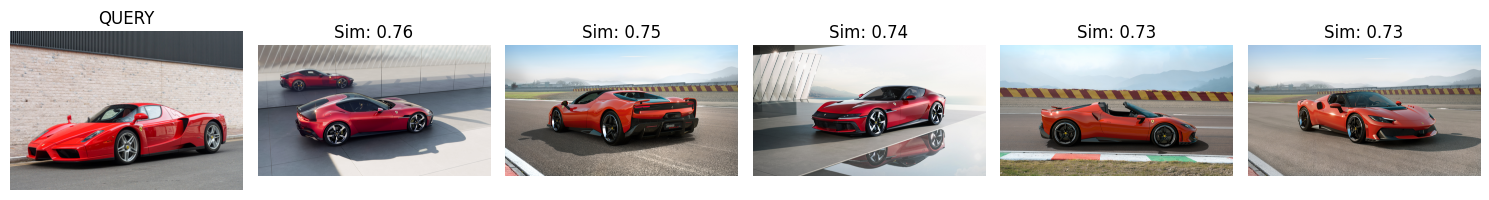

In [9]:
import os
dataset_path = "/kaggle/input/test-ferrari-images"

print("📁 AVAILABLE IMAGES:")
for fname in os.listdir(dataset_path):
    print(fname)

def recommend_from_path(file_path, top_k=5):
    if os.path.exists(file_path):
        print(f"\n🖼️ SELECTED IMAGE: {file_path}")
        show_similar_images(file_path, top_k=top_k) 
    else:
        print("❌ Invalid path. Make sure the file exists.")

recommend_from_path("/kaggle/input/test-ferrari-images/test_ferrari1.jpg", top_k=5)



🖼️ SELECTED IMAGE: /kaggle/input/test-ferrari-images/test_ferrari2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


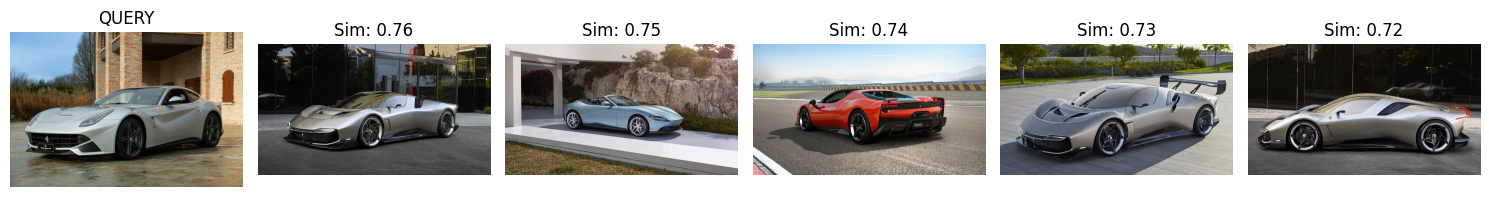

In [10]:
recommend_from_path("/kaggle/input/test-ferrari-images/test_ferrari2.jpg", top_k=5)